In [1]:
import matplotlib.pyplot as plt # https://matplotlib.org/index.html
import tensorflow as tf   
import numpy as np

#### 1. 读取图片

In [2]:
# read image
image_raw_data = tf.gfile.FastGFile("../0_datasets/cat.jpg",'rb').read()

with tf.Session() as sess:
    # 解码
    # tf.image.decode_png
    # 解码之后的结果为一个tensor,使用取值之前需要调用运行过程：img_data.eval()。
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print(img_data.eval()) # 需要调用运行过程
    img_data.set_shape([1797, 2673, 3])
    print(img_data.get_shape())

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(1797, 2673, 3)


#### 2. 打印图片

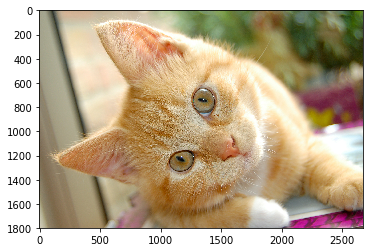

In [4]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

#### 3. 重新调整图片大小
```python
tf.image.resize_images(
    images,
    size,
    method=ResizeMethod.BILINEAR,
    align_corners=False,
    preserve_aspect_ratio=False
)
```
#### method can be one of:
* ResizeMethod.BILINEAR: Bilinear interpolation.
* ResizeMethod.NEAREST_NEIGHBOR: Nearest neighbor interpolation.
* ResizeMethod.BICUBIC: Bicubic interpolation.
* ResizeMethod.AREA: Area interpolation.


[0.63529414 0.6313726  0.54901963]
resized.shape:  (300, 300, 3)


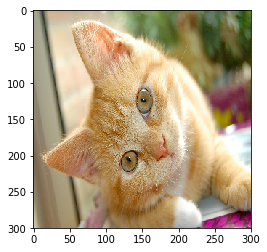

In [6]:
with tf.Session() as sess:
    # 如果直接以0-255范围的整数数据输入resize_images，那么输出将是0-255之间的实数，
    # 不利于后续处理。本书建议在调整图片大小前，先将图片转为0-1范围的实数。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # 0-1范围
    resized = tf.image.resize_images(image_float, [300, 300], method=0) # method:0~3
    print image_float.eval()[0][0] # 0-1范围
    print "resized.shape: ", resized.get_shape()
    plt.imshow(resized.eval()) # resized.eval()
    plt.show()

#### 4. 裁剪和填充图片
```python
tf.image.resize_image_with_crop_or_pad(image, target_height, target_width)
```
* Crops and/or pads an image to a target width and height.
* 截取或填充图像`中间部分`。

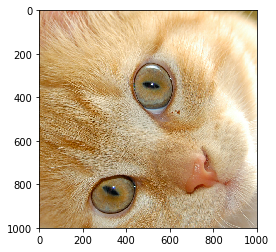

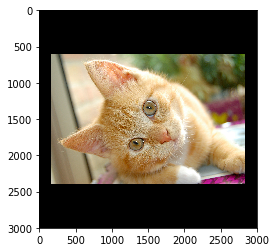

In [9]:
with tf.Session() as sess:
    # img_data: (1797, 2673)
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

#### 5. 截取中间50%的图片
```python
tf.image.central_crop(
    image,
    central_fraction
)
```
* Crop the central region of the image(s).
* central_fraction: float (0, 1], fraction of size to crop

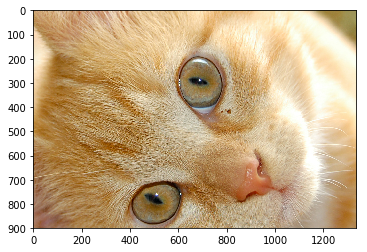

In [10]:
with tf.Session() as sess:   
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_cropped.eval())
    plt.show()

#### 填充(pad)给定区域的图像
```python
tf.image.pad_to_bounding_box(
    image,
    offset_height,
    offset_width,
    target_height,
    target_width
)
```
* Pad image with zeros to the specified height and width.
* offset_height: Number of rows of zeros to add on top.
* offset_width: Number of columns of zeros to add on the left.
* target_height: Height of output image.
* target_width: Width of output image.

* [api_guides_cropping](https://www.tensorflow.org/api_guides/python/image#Cropping)

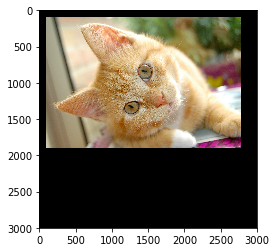

In [11]:
with tf.Session() as sess:
    pad_img = tf.image.pad_to_bounding_box(img_data, 100, 100, 3000, 3000)
    plt.imshow(pad_img.eval())
    plt.show()

#### 裁剪(crop)给定区域的图像
```python
tf.image.crop_to_bounding_box(
    image,
    offset_height,
    offset_width,
    target_height,
    target_width
)
```
* Crops an image to a specified bounding box.
* offset_height: Vertical coordinate of the top-left corner of the result in the input.
* offset_width: Horizontal coordinate of the top-left corner of the result in the input.
* target_height: Height of the result.
* target_width: Width of the result.

* [api_guides_cropping](https://www.tensorflow.org/api_guides/python/image#Cropping)

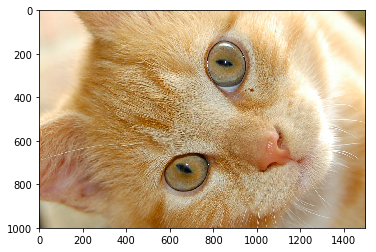

In [13]:
with tf.Session() as sess:
    # img_data: (1797, 2673)
    crop_img = tf.image.crop_to_bounding_box(img_data, 500, 500, 1000, 1500)
    plt.imshow(crop_img.eval())
    plt.show()

#### 6. 翻转图片

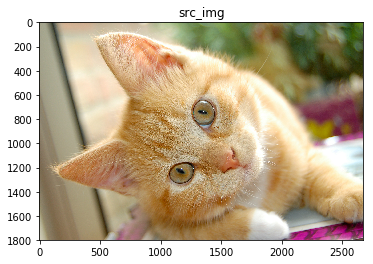

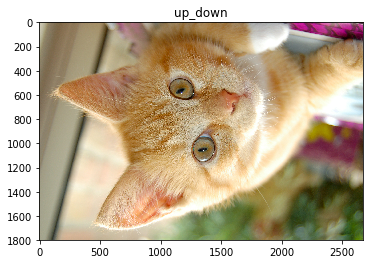

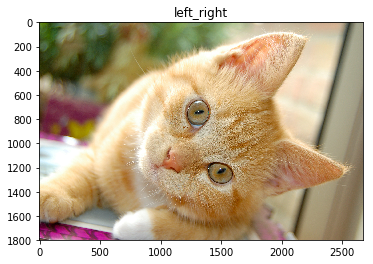

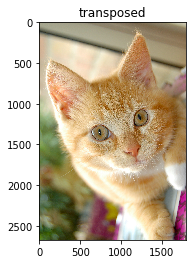

In [14]:
with tf.Session() as sess: 
    plt.imshow(img_data.eval())
    plt.title("src_img")
    plt.show()
    # 上下翻转
    flipped1 = tf.image.flip_up_down(img_data)
    # 左右翻转
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped1.eval())
    plt.title("up_down")
    plt.show()
    plt.imshow(flipped2.eval())
    plt.title("left_right")
    plt.show()
    #对角线翻转
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    plt.title("transposed")
    plt.show()
    
    # 以一定概率上下翻转图片。在一定batch时有效
#     flipped3 = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
#     flipped4 = tf.image.random_flip_left_right(img_data)
    

#### 7. 图片色彩调整
```python
tf.clip_by_value(
    t,
    clip_value_min,
    clip_value_max,
    name=None
)
```
* Clips tensor values to a specified min and max.

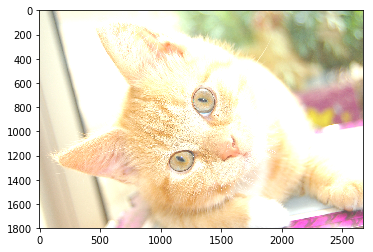

In [15]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # [0, 1],float 
    
    # 将图片的亮度-0.5。
    #adjusted = tf.image.adjust_brightness(image_float, -0.5)
    
    # 将图片的亮度+0.5
    #adjusted = tf.image.adjust_brightness(image_float, 0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    adjusted = tf.image.random_brightness(image_float, max_delta=0.5)
    
    # 将图片的对比度-5
    #adjusted = tf.image.adjust_contrast(image_float, -5)
    
    # 将图片的对比度+5
    #adjusted = tf.image.adjust_contrast(image_float, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    #adjusted = tf.image.random_contrast(image_float, lower, upper)

    # 在最终输出前，将实数取值截取到0-1范围内。
    # Clips tensor values to a specified min and max.
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

#### 8. 添加色相和饱和度

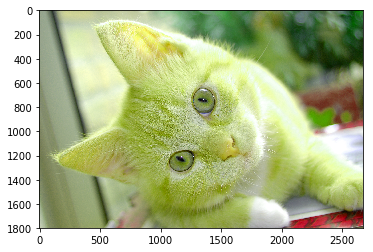

In [16]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # 调整RGB图像的色调。
    adjusted = tf.image.adjust_hue(image_float, 0.1)
    #adjusted = tf.image.adjust_hue(image_float, 0.3)
    #adjusted = tf.image.adjust_hue(image_float, 0.6)
    #adjusted = tf.image.adjust_hue(image_float, 0.9)
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    #adjusted = tf.image.random_hue(image_float, max_delta)
    
    # 将图片的饱和度-5。
    #adjusted = tf.image.adjust_saturation(image_float, -5)
    # 将图片的饱和度+5。
    #adjusted = tf.image.adjust_saturation(image_float, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
    #adjusted = tf.image.random_saturation(image_float, lower, upper)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    #adjusted = tf.image.per_image_whitening(image_float)
    
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

#### 9. 添加标注框并裁减。

#### 9.1 绘制标注框
##### 1.
```python
tf.expand_dims(
    input,
    axis=None,
    name=None,
    dim=None
)
```
* Inserts a dimension of 1 into a tensor's shape.
* This operation is useful if you want to `add a batch dimension` to a single element. For example, if you have a single image of shape `[height, width, channels]`, you can make it a batch of 1 image with expand_dims(image, 0), which will make the shape `[1, height, width, channels]`.

##### 2.
```python
tf.image.draw_bounding_boxes(
    images,
    boxes,
    name=None
)
```
* Draw bounding boxes on a batch of images.
* Args:
    1. images: A Tensor. Must be one of the following types: float32, half. 4-D with shape `[batch, height, width, depth]`. A batch of images.
    2. boxes: A Tensor of type float32. 3-D with shape `[batch, num_bounding_boxes, 4]` containing bounding boxes.
    3. name: A name for the operation (optional).


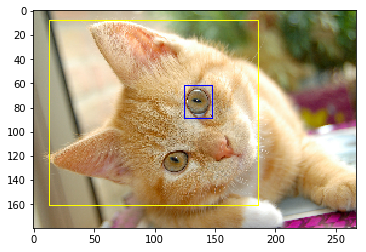

In [17]:
with tf.Session() as sess:
    # bbox:[ymin, xmin, ymax, xmax]
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    # convert to float [0, 1].
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # resize to show image.
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    # expand dimention, add a batch dimension
    batchced_img = tf.expand_dims(image_small, 0)
    # draw_bounding_boxes
    # Draw bounding boxes on a batch of images.
    bbox_img = tf.image.draw_bounding_boxes(batchced_img, boxes)
    plt.imshow(bbox_img[0].eval()) # bbox_img[0]: the current image.
    plt.show()

#### 9.2 随机截取图像
* [tf.image.sample_distorted_bounding_box](https://www.tensorflow.org/api_docs/python/tf/image/sample_distorted_bounding_box)

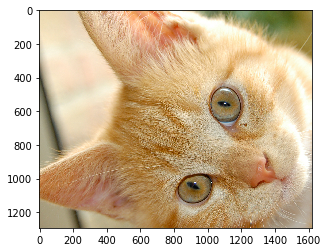

batch_img.shape:  Tensor("Shape_1:0", shape=(4,), dtype=int32)
[[[0.16304953 0.48858958 0.92376184 0.89375234]]]


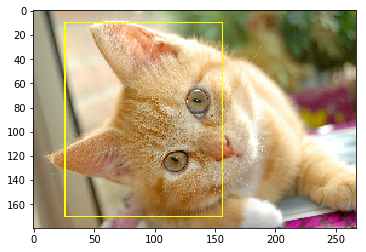

In [18]:
with tf.Session() as sess: 
    # [ymin, xmin, ymax, xmax]
    # 标注框告诉哪些信息是有信息量的。
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # begin: A Tensor. Has the same type as image_size. 1-D, containing [offset_height, offset_width, 0]. 
    # Provide as input to tf.slice.
    # size: A Tensor. Has the same type as image_size. 1-D, containing [target_height, target_width, -1]. 
    # Provide as input to tf.slice.
    # bbox_for_draw: A Tensor of type float32. 3-D with shape [1, 1, 4] containing the distorted bounding box. 
    # Provide as input to tf.image.draw_bounding_boxes.
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_float), bounding_boxes=boxes, min_object_covered=0.4)
    
    # 截取后的图片
    distorted_image = tf.slice(image_float, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()

    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    # Inserts a dimension of 1 into a tensor's shape.
    # 图像加一维形成batch.
    batchced_img = tf.expand_dims(image_small, 0) # []
    print "batch_img.shape: ", tf.shape(batchced_img)
    image_with_box = tf.image.draw_bounding_boxes(batchced_img, bbox_for_draw)
    print(bbox_for_draw.eval()) # 相对值
    plt.imshow(image_with_box[0].eval())
    plt.show()
    
    